In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.0MB/s 
     |████████████████████████████████| 194kB 29.7MB/s 
     |████████████████████████████████| 1.2MB 27.1MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
#array(im3)[4:10,4:10]
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [ ]:
tensor(im3)[4:10,4:10]
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [ ]:
im3_t = tensor(im3)
#df = pd.DataFrame(im3_t[4:15,4:22])
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

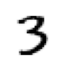

In [ ]:
show_image(three_tensors[1]);

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
len(stacked_threes.shape) #rank of tensor

3

In [ ]:
stacked_threes.ndim #also rank of the tensor

3

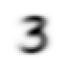

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

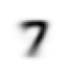

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

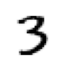

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3);

In [ ]:
dist_3_abs = (a_3 - mean3).abs().mean() #L1 norm
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt() #L2 norm
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [ ]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [ ]:
data = [[1,2,3],[4,5,6]]
arr = array (data) #numpy
tns = tensor(data) #pytorch

In [ ]:
tns[1]

tensor([4, 5, 6])

In [ ]:
tns[:,1]
tns[1,1:3] #slicing
tns+1 #addition, subtraction, multiplication, division
tns*2

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

In [ ]:
tns.type()

'torch.LongTensor'

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [ ]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1092, 0.1758, 0.1456,  ..., 0.1106, 0.1080, 0.1464]),
 torch.Size([1010]))

In [ ]:
tensor([[1,2,3], [2, 5, 6]]) + tensor([1])

tensor([[2, 3, 4],
        [3, 6, 7]])

In [ ]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [ ]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [ ]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [ ]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [ ]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [ ]:
xt = tensor(3.).requires_grad_() #tags the variable to also compute the gradient along the steps

In [ ]:
def f(x): return x*x
yt = f(xt)
yt


tensor(9., grad_fn=<MulBackward0>)

In [ ]:
yt.backward() #tells pytorch to calculate the gradient

In [ ]:
#backward refers to backpropagation -> calculates the derivative of each layer
#also called the backward pass of the network, as opposed to the forward pass, which is where the activations are calculated
xt.grad #this lets us view the gradients by checking the grad attribute of our tensor

tensor(6.)

In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_() #vector derivative
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return (x**2).sum() #scalar function

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad #should return 2*xt

tensor([ 6.,  8., 20.])

In [ ]:
#simple sgd example
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

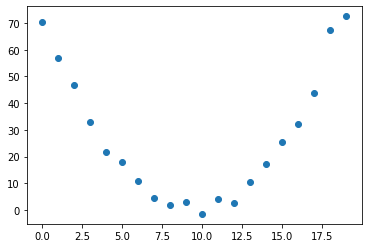

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [ ]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

In [ ]:
params = torch.randn(3).requires_grad_()

In [ ]:
orig_params = params.clone()
orig_params #original params that we used

tensor([ 1.5980,  0.1115, -0.0392], grad_fn=<CloneBackward>)

In [ ]:
preds = f(time, params)

In [ ]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

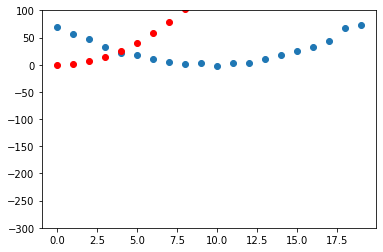

In [ ]:
show_preds(preds)

In [ ]:
#calculating the loss
loss = mse(preds, speed)
loss

tensor(245.9481, grad_fn=<SqrtBackward>)

In [ ]:
#calculating the gradients
loss.backward()
params.grad

tensor([166.7545,  10.7182,   0.6967])

In [ ]:
lr = 1e-5 #learning rate
params.grad * lr

tensor([1.6675e-03, 1.0718e-04, 6.9670e-06])

In [ ]:
params
params.data
params.grad

tensor([166.7545,  10.7182,   0.6967])

In [ ]:
#update parameters based on the gradients we have just calculated
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [ ]:
preds = f(time,params)
mse(preds, speed)

tensor(245.6689, grad_fn=<SqrtBackward>)

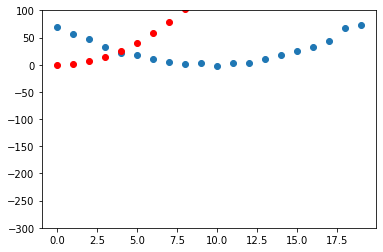

In [ ]:
show_preds(preds)

In [ ]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [ ]:
for i in range(100): apply_step(params)

244.83123779296875
244.55201721191406
244.27285766601562
243.99368286132812
243.7145233154297
243.4353485107422
243.15618896484375
242.87704467773438
242.597900390625
242.31878662109375
242.03964233398438
241.76052856445312
241.4813995361328
241.20233154296875
240.92323303222656
240.64413452148438
240.3650665283203
240.0859832763672
239.8069305419922
239.5278778076172
239.2488555908203
238.96978759765625
238.6907501220703
238.4117431640625
238.13272094726562
237.85372924804688
237.57472229003906
237.2957305908203
237.01675415039062
236.73777770996094
236.4588165283203
236.1798858642578
235.90090942382812
235.62197875976562
235.3430633544922
235.0641326904297
234.7852020263672
234.50631713867188
234.22743225097656
233.94854736328125
233.66966247558594
233.39077758789062
233.1119384765625
232.8330841064453
232.5542449951172
232.27537536621094
231.99656677246094
231.7177734375
231.43894958496094
231.16017150878906
230.88134765625
230.6025848388672
230.32379150390625
230.0450439453125
229.

In [ ]:
params = orig_params.detach().requires_grad_()

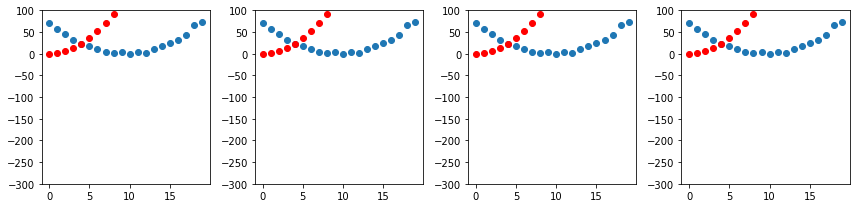

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [ ]:
#ACTUAL SGD
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28,1))

In [ ]:
bias = init_params(1) #y=weights*x+bias

In [ ]:
(train_x[0]*weights.T).sum() + bias

tensor([16.2561], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[16.2561],
        [14.0191],
        [16.8736],
        ...,
        [ 5.3612],
        [ 5.3861],
        [ 0.3403]], grad_fn=<AddBackward0>)

In [ ]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [ True]])

In [ ]:
corrects.float().mean().item()

0.5957567095756531

In [ ]:
weights[0] *= 1.0001

In [ ]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.5855114459991455

In [ ]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [ ]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

/usr/local/lib/python3.6/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


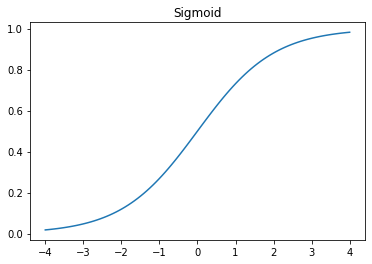

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [ ]:
#INITIALISE THE PARAMETER
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([[-5.9718],
        [-2.1521],
        [-7.9371],
        [-9.4040]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9732, grad_fn=<MeanBackward0>)

In [ ]:
#calculating the gradients
loss.backward() #gradient
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0034), tensor([-0.0241]))

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0069), tensor([-0.0481]))

In [ ]:
#loss.backward adds the gradients of loss to any gradients that are currently stored
#so we have to set the current gradients to 0 first
#if you call calc_grad twice, the gradients are accumulated
weights.grad.zero_()
bias.grad.zero_();

In [ ]:
#update the weights and biases based on gradient and learning rate
#have to tell pytorch not to take the gradient of that step too

### basic training loop for an epoch
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [ ]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [ ]:
### function to calculate validation accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [ ]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.5314

In [ ]:
### training for one epoch
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6855

In [ ]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8637 0.9233 0.9428 0.954 0.9579 0.9613 0.9628 0.9637 0.9667 0.9671 0.9676 0.9676 0.9686 0.9696 0.9696 0.9701 0.9701 0.9701 0.9701 0.9701 

In [ ]:
### OPTIMISERS HANDLE THE SGD STEP

linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.4018

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.4932 0.8994 0.8062 0.9058 0.9321 0.9458 0.9551 0.9609 0.9653 0.9678 0.9692 0.9721 0.9736 0.9751 0.9756 0.9765 0.9775 0.978 0.978 0.979 

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8305 0.8423 0.9141 0.9326 0.9472 0.957 0.9629 0.9653 0.9673 0.9697 0.9721 0.9726 0.9751 0.9761 0.9765 0.9775 0.978 0.978 0.9785 

In [ ]:
### fastai has Learner.fit, which can replace train_model. To create a Learner, first need to create a DataLoaders
### pass in training and validation dataloader
dls = DataLoaders(dl, valid_dl)

In [ ]:
### to create a learner, need to pass in dataloaders, model, optimisation function,
### the loss function and optionally any metric to print
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636241,0.503370,0.495584,00:00
1,0.476081,0.205992,0.824338,00:00
2,0.176451,0.170415,0.847890,00:00
3,0.078261,0.103559,0.915604,00:00
4,0.042080,0.076544,0.932777,00:00
5,0.027938,0.061665,0.947007,00:00
6,0.022107,0.052297,0.954367,00:00
7,0.019499,0.046025,0.963199,00:00
8,0.018164,0.041606,0.965653,00:00
9,0.017353,0.038348,0.966634,00:00


In [ ]:
# adding nonlinearity: a basic neural network
def simple_net(xb): 
    res = xb@w1 + b1 #linear classifier
    res = res.max(tensor(0.0)) #nonlinear function
    res = res@w2 + b2 #linear classifier
    return res

# w1, w2 are weight tensors
# b1, b2 are bias tensors

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

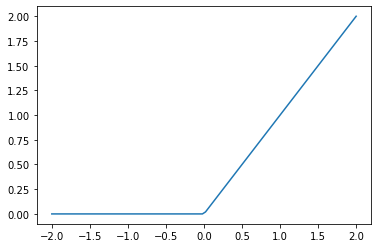

In [ ]:
#w1 has 30 output activations -> w2 must have 30 input activations
#implies that first layer can construct 30 different features (each representing some mix of pixels)
#>30 -> more complex model

# max is a rectified linear unit ReLU. -- same as F.relu in pytorch

# the point of nonlinear functions is so as to decouple the linear functions
### the nonlinear function is also known as activation layer
plot_function(F.relu)

In [ ]:
### sequential creates a module that will call each of the listed layers or functions in turn
### nn.ReLU does the same as F.relu
### nn.
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)
simple_net

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.324991,0.401134,0.509323,00:00
1,0.151320,0.232263,0.803238,00:00
2,0.083129,0.115050,0.915604,00:00
3,0.054040,0.077016,0.942591,00:00
4,0.040605,0.060012,0.958292,00:00
5,0.033798,0.050536,0.964181,00:00
6,0.029934,0.044569,0.966634,00:00
7,0.027452,0.040489,0.968597,00:00
8,0.025680,0.037525,0.969578,00:00
9,0.024313,0.035266,0.971050,00:00


0.982826292514801

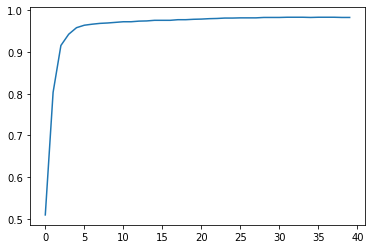

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));
learn.recorder.values[-1][2]

In [ ]:
### an 18 layer model
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.125158,0.047517,0.993621,00:24


### Further Research

1. Create your own implementation of `Learner` from scratch, based on the training loop shown in this chapter.
1. Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.